In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [29]:
data = pd.read_csv('covid19 _covid19.csv')
coordinates = pd.read_csv('Indian_Coordinates.csv')
data.describe(include="all")


,1,Patient Number,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Nationality,Type of transmission
count,2892.000000,2892.000000,2892,778.000000,930,1986,2892,2892,425,1764
unique,NaN,NaN,36,NaN,2,217,30,4,10,3
top,NaN,NaN,02/04/2020,NaN,M,Mumbai,Maharashtra,Hospitalized,India,TBD
freq,NaN,NaN,486,NaN,688,198,423,2798,368,803
mean,1447.500000,1446.500000,NaN,40.672237,NaN,NaN,NaN,NaN,NaN,NaN
std,834.992814,834.992814,NaN,16.960451,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,724.750000,723.750000,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1447.500000,1446.500000,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2170.250000,2169.250000,NaN,54.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data.head(10)

,1,Patient Number,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Nationality,Type of transmission
0,2,1,30/01/2020,20.0,F,Thrissur,Kerala,Recovered,India,Imported
1,3,2,02/02/2020,NaN,NaN,Alappuzha,Kerala,Recovered,India,Imported
2,4,3,03/02/2020,NaN,NaN,Kasaragod,Kerala,Recovered,India,Imported
3,5,4,02/03/2020,45.0,M,East Delhi,Delhi,Recovered,India,Imported
4,6,5,02/03/2020,24.0,M,Hyderabad,Telangana,Recovered,India,Imported
5,7,6,03/03/2020,69.0,M,Jaipur,Rajasthan,Recovered,Italy,Imported
6,8,7,04/03/2020,55.0,NaN,Gurugram,Haryana,Recovered,Italy,Imported
7,9,8,04/03/2020,55.0,NaN,Gurugram,Haryana,Recovered,Italy,Imported
8,10,9,04/03/2020,55.0,NaN,Gurugram,Haryana,Recovered,Italy,Imported
9,11,10,04/03/2020,55.0,NaN,Gurugram,Haryana,Recovered,Italy,Imported


In [31]:
data.isnull().sum()

1                          0
Patient Number             0
Date Announced             0
Age Bracket             2114
Gender                  1962
Detected District        906
Detected State             0
Current Status             0
Nationality             2467
Type of transmission    1128
dtype: int64

In [32]:
data.columns

Index(['1', 'Patient Number', 'Date Announced', 'Age Bracket', 'Gender',
       'Detected District', 'Detected State', 'Current Status', 'Nationality',
       'Type of transmission'],
      dtype='object')

In [0]:
Recovered = data[data['Current Status'] == 'Recovered']
Recovered_count = Recovered['1'].count()

In [34]:
Active = data[data['Current Status'] == 'Hospitalized']
Active_count = Active['1'].count()
Death = data[data['Current Status'] == 'Deceased']
Death_count = Death['1'].count()

print("There are " , Recovered_count ," recovered and " , Death_count , " are dead and ",Active_count," are still in Hospital "  )

There are  71  recovered and  22  are dead and  2798  are still in Hospital 


In [35]:
male = data[data['Gender'] == 'M']
male_count = male['1'].count()
female = data[data['Gender'] == 'F']
female_count = female['1'].count()

print("There are",male_count,"male and",female_count,"female patient")

There are 688 male and 242 female patient


M = Male and F = Female


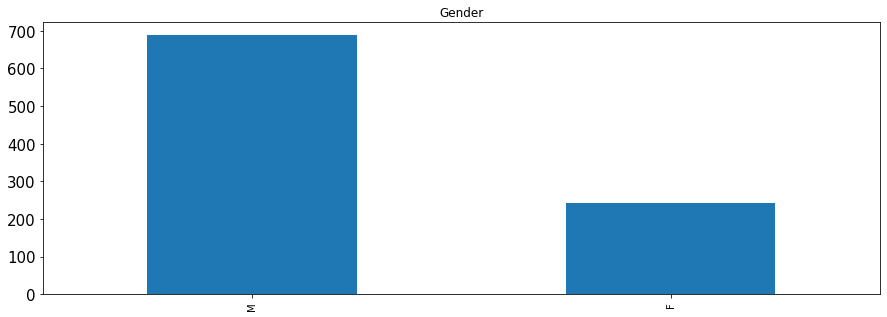

In [36]:
plt.figure(figsize=(15,5))
plt.title("Gender")
data.Gender.value_counts().plot.bar();
print("M = Male and F = Female")

In [37]:
data['Recovered'] = data['Current Status']
data['Death'] = data['Current Status']
data['Active'] = data['Current Status']
data.head()

,1,Patient Number,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Nationality,Type of transmission,Recovered,Death,Active
0,2,1,30/01/2020,20.0,F,Thrissur,Kerala,Recovered,India,Imported,Recovered,Recovered,Recovered
1,3,2,02/02/2020,NaN,NaN,Alappuzha,Kerala,Recovered,India,Imported,Recovered,Recovered,Recovered
2,4,3,03/02/2020,NaN,NaN,Kasaragod,Kerala,Recovered,India,Imported,Recovered,Recovered,Recovered
3,5,4,02/03/2020,45.0,M,East Delhi,Delhi,Recovered,India,Imported,Recovered,Recovered,Recovered
4,6,5,02/03/2020,24.0,M,Hyderabad,Telangana,Recovered,India,Imported,Recovered,Recovered,Recovered


In [38]:
embarked_mapping = {"Recovered": 1, "Hospitalized": 0, "Deceased": 0}
data['Recovered'] = data['Recovered'].map(embarked_mapping)
active_mapping = {"Recovered": 0, "Hospitalized": 1, "Deceased": 0}
data['Active'] = data['Active'].map(active_mapping)
death_mapping = {"Recovered": 0, "Hospitalized": 0, "Deceased": 1}
data['Death'] = data['Death'].map(death_mapping)
data

,1,Patient Number,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Nationality,Type of transmission,Recovered,Death,Active
0,2,1,30/01/2020,20.0,F,Thrissur,Kerala,Recovered,India,Imported,1.0,0.0,0.0
1,3,2,02/02/2020,NaN,NaN,Alappuzha,Kerala,Recovered,India,Imported,1.0,0.0,0.0
2,4,3,03/02/2020,NaN,NaN,Kasaragod,Kerala,Recovered,India,Imported,1.0,0.0,0.0
3,5,4,02/03/2020,45.0,M,East Delhi,Delhi,Recovered,India,Imported,1.0,0.0,0.0
4,6,5,02/03/2020,24.0,M,Hyderabad,Telangana,Recovered,India,Imported,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,2889,2888,03/04/2020,NaN,NaN,NaN,Madhya Pradesh,Hospitalized,NaN,NaN,0.0,0.0,1.0
2888,2890,2889,03/04/2020,NaN,NaN,NaN,Madhya Pradesh,Hospitalized,NaN,NaN,0.0,0.0,1.0
2889,2891,2890,03/04/2020,70.0,M,Belagavi,Karnataka,Hospitalized,NaN,NaN,0.0,0.0,1.0
2890,2892,2891,03/04/2020,26.0,M,Belagavi,Karnataka,Hospitalized,NaN,NaN,0.0,0.0,1.0


Most of the affected people are Indians only.

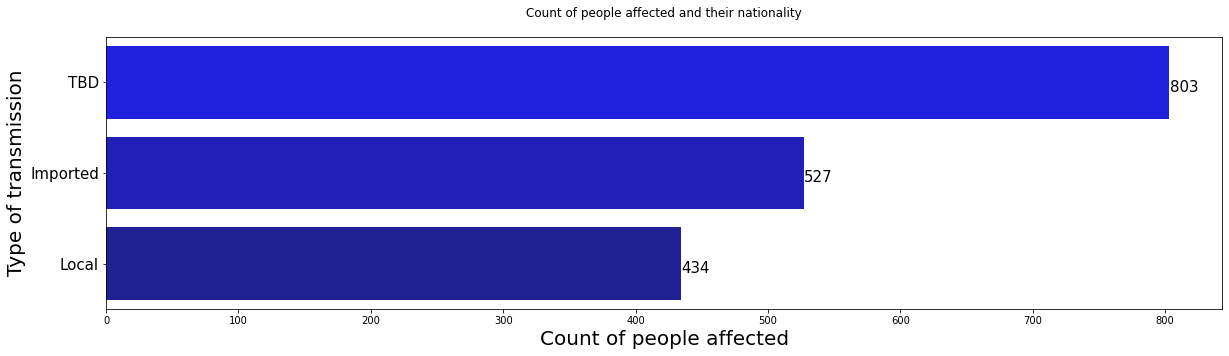

In [39]:
plt.figure(figsize=(20,5))
df = pd.DataFrame({'Type of transmission' : data['Type of transmission'].value_counts().index,'Count':data['Type of transmission'].value_counts().values})

ax = sns.barplot(x="Count",y = "Type of transmission",data=df,palette = sns.dark_palette("blue",reverse = True))

for i in ax.patches:
  ax.text(i.get_width()+0.50, i.get_y()+0.50, \
            str(int(i.get_width())), fontsize=15,color='black')
ax.set_title('Count of people affected and their nationality',pad=20)
plt.xlabel('Count of people affected', fontsize=20)
plt.ylabel('Type of transmission', fontsize=20)
plt.rc('xtick' , labelsize=10)
plt.rc('ytick', labelsize=8)
plt.show()

Reason for most of the covid19 cases is still unknown.

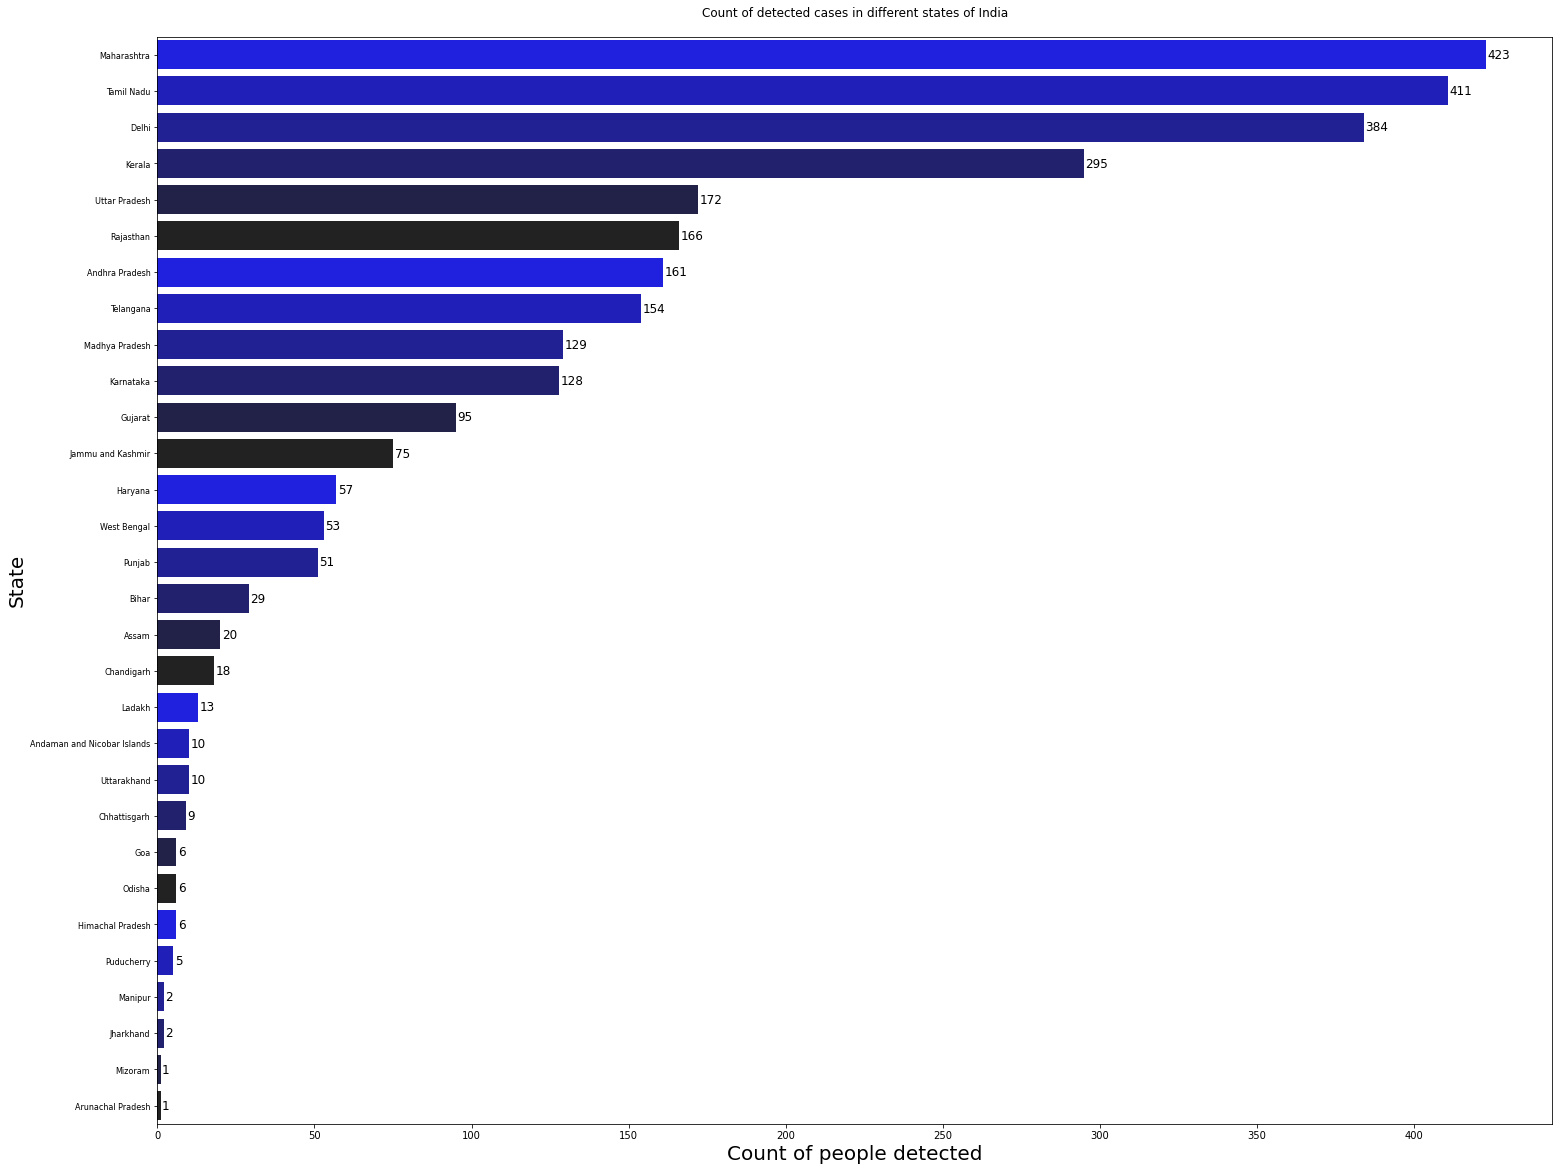

In [40]:
plt.figure(figsize=(25,20))
ax = sns.barplot(data['Detected State'].value_counts().values,data['Detected State'].value_counts().index , palette= sns.dark_palette("blue",reverse = True))

for i in ax.patches:
  ax.text(i.get_width()+0.50, i.get_y()+0.50, \
          str(int(i.get_width())) , fontsize=12,color="black")

ax.set_title('Count of detected cases in different states of India',pad=20)
plt.xlabel('Count of people detected', fontsize=20)
plt.ylabel('State',fontsize = 20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=15)
plt.show()

In [41]:
data['Date Announced']  = data['Date Announced'].astype('datetime64[ns]')

data['Date Announced'] = data['Date Announced'].dt.strftime('%m/%d/%y')

data

,1,Patient Number,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Nationality,Type of transmission,Recovered,Death,Active
0,2,1,01/30/20,20.0,F,Thrissur,Kerala,Recovered,India,Imported,1.0,0.0,0.0
1,3,2,02/02/20,NaN,NaN,Alappuzha,Kerala,Recovered,India,Imported,1.0,0.0,0.0
2,4,3,03/02/20,NaN,NaN,Kasaragod,Kerala,Recovered,India,Imported,1.0,0.0,0.0
3,5,4,02/03/20,45.0,M,East Delhi,Delhi,Recovered,India,Imported,1.0,0.0,0.0
4,6,5,02/03/20,24.0,M,Hyderabad,Telangana,Recovered,India,Imported,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,2889,2888,03/04/20,NaN,NaN,NaN,Madhya Pradesh,Hospitalized,NaN,NaN,0.0,0.0,1.0
2888,2890,2889,03/04/20,NaN,NaN,NaN,Madhya Pradesh,Hospitalized,NaN,NaN,0.0,0.0,1.0
2889,2891,2890,03/04/20,70.0,M,Belagavi,Karnataka,Hospitalized,NaN,NaN,0.0,0.0,1.0
2890,2892,2891,03/04/20,26.0,M,Belagavi,Karnataka,Hospitalized,NaN,NaN,0.0,0.0,1.0


In [42]:
recent_stats = data.groupby('Date Announced',as_index=False)['Active','Death','Recovered'].sum()
sorted_stats = recent_stats.sort_values(by = 'Date Announced',ascending= False)
sorted_stats.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date Announced,Active,Death,Recovered
35,12/03/20,5.0,3.0,4.0
34,11/03/20,7.0,0.0,0.0
33,10/03/20,5.0,0.0,10.0
32,09/03/20,4.0,0.0,5.0
31,08/03/20,0.0,0.0,5.0


In [43]:
fig = go.Figure()
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d-%m-%y')
ax.xaxis.set_major_formatter(myFmt)
fig.add_trace(go.Scatter(
                x = sorted_stats['Date Announced'],
                y = sorted_stats['Active'],
                name = "Active Cases",
                line_color = "deepskyblue",
                opacity = 0.8))

fig.update_layout(title_text = "Daily reprted covid cases across in India")
fig.show()

In [44]:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x = recent_stats['Date Announced'],
    y = recent_stats['Death'],
    name = "Total Deaths",
    line_color = "gray",
    opacity = 0.8))

fig2.add_trace(go.Scatter(
    x = recent_stats['Date Announced'],
    y = recent_stats['Recovered'],
    name = "Recovered",
    line_color = "green",
    opacity = 0.8))

fig2.update_layout(title_text = "Death and Recovered cases across India on different dates.")
fig2.show()

*Top 20 states with highest number of people affected*

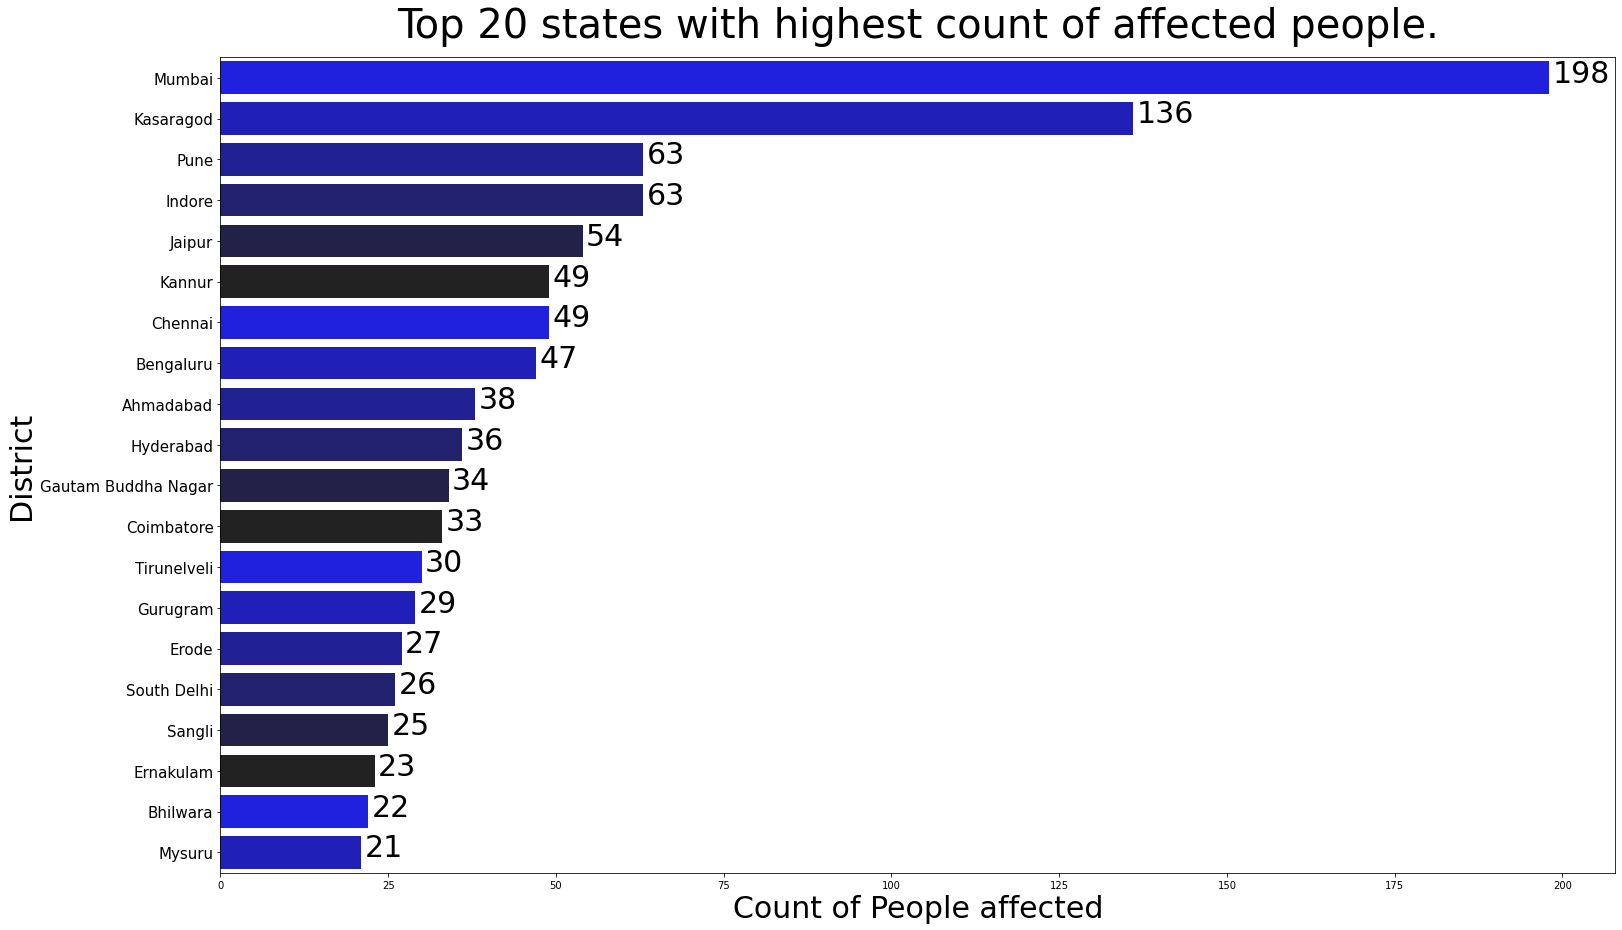

In [49]:
plt.figure(figsize = (25,15))
ax = sns.barplot(data['Detected District'].value_counts()[:20].values,data['Detected District'].value_counts()[:20].index,
               palette = sns.dark_palette("blue",reverse=True))

for i in ax.patches:
  ax.text(i.get_width()+0.50 , i.get_y()+0.50, \
          str(int(i.get_width())),fontsize = 30 , color='black')
  
ax.set_title("Top 20 states with highest count of affected people." , pad=20,fontsize=40)
plt.xlabel('Count of People affected',fontsize = 30)
plt.ylabel('District',fontsize = 30)
plt.show()  


In [50]:
print("Mumbai is the leading city with over 200 cases.")

Mumbai is the leading city with over 200 cases.


In [0]:
#Get Recent Stats

In [54]:
age_stats = data.groupby('Age Bracket',as_index=False)['Active','Death','Recovered'].sum()
sortedge_stats = age_stats.sort_values(by = 'Age Bracket' , ascending=False)
sortedge_stats

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Age Bracket,Active,Death,Recovered
78,96.0,0.0,0.0,1.0
77,92.0,1.0,0.0,0.0
76,89.0,0.0,0.0,1.0
75,85.0,0.0,1.0,1.0
74,81.0,2.0,0.0,0.0
...,...,...,...,...
4,7.0,4.0,0.0,0.0
3,6.0,1.0,0.0,0.0
2,3.0,4.0,0.0,1.0
1,2.0,2.0,0.0,0.0


In [58]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter(
    x = sortedge_stats['Age Bracket'],
    y = sortedge_stats['Active'],
    name = "Active Cases",
    line_color = "skyblue",
    opacity = 0.8
))

fig4.update_layout(title_text = "Daily reported covid cases with different AGE GROUP ")
fig4.show()

**Most affected age group with covid19 is 20 to 35 years old.**

In [59]:
fig3 = go.Figure()

fig3.add_trace(go.Scatter(
    x = age_stats['Age Bracket'],
    y = age_stats['Death'],
    name = "Total Deaths",
    line_color = 'gray',
    opacity = 0.8
))

fig3.add_trace(go.Scatter(
    x = age_stats['Age Bracket'],
    y = age_stats['Recovered'],
    name = 'Recovered',
    line_color = 'green',
    opacity = 0.8
))

fig3.update_layout(title_text="Death and Recovered Case with different Age groups")
fig3.show()

**Most of the death are occuring in age between 60-70**

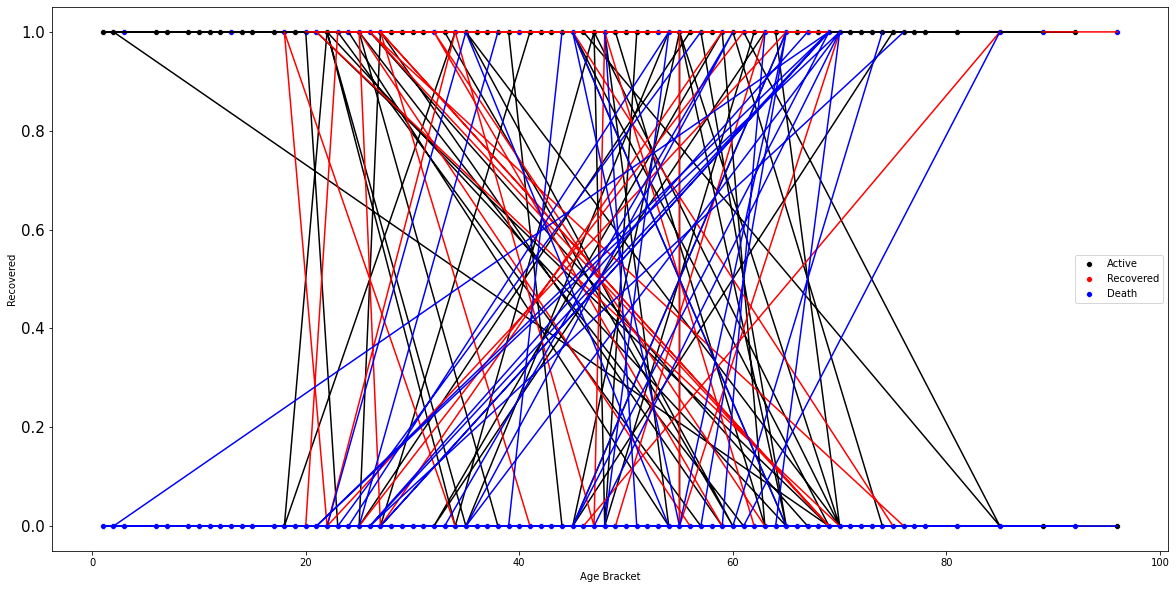

In [62]:
f,ax = plt.subplots(figsize = (20,10))
ax = sns.scatterplot(x = "Age Bracket",y = "Active", data = data,color='black',label='Active')
ax = sns.scatterplot(x = "Age Bracket", y = "Recovered", data = data,color = 'red' , label = 'Recovered')
ax = sns.scatterplot(x = "Age Bracket",y="Recovered" , data = data , color= 'blue' , label="Death")

plt.plot(data['Age Bracket'],data.Active,zorder = 1,color= "black")
plt.plot(data['Age Bracket'],data.Recovered,zorder = 1,color="red")
plt.plot(data['Age Bracket'],data.Death,zorder =1,color='blue')

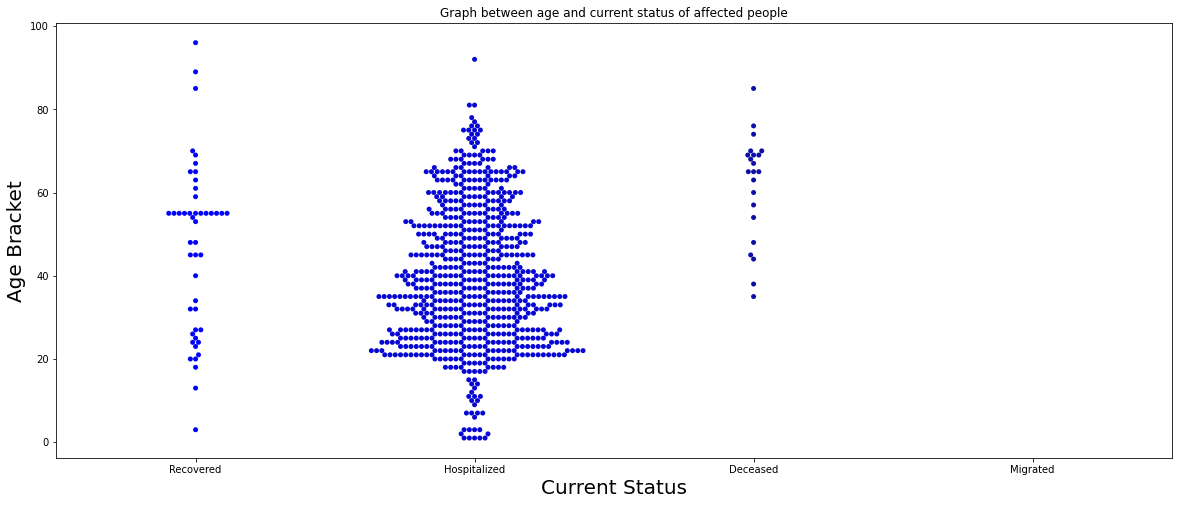

In [66]:
plt.figure(figsize=(20,8))

ax = sns.swarmplot(data['Current Status'],data['Age Bracket'],palette=sns.dark_palette("blue",reverse=True))

ax.set_title("Graph between age and current status of affected people")

plt.xlabel('Current Status',fontsize = 20)
plt.ylabel('Age Bracket',fontsize = 20)
plt.rc('xtick',labelsize = 10)
plt.rc('ytick',labelsize=10)